In [81]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [82]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/기획경영_전처리/전략기획.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,솔루션 및 프로젝트 기획 콘셉트와 내외부의 문제 요구 사항 필요한 기능 등 정의...,해당 직무에서 2 년 이상 경험을 보유하시고 스토리보드 작성이 가능하신 분 수단...
1,VitalCare 서비스 기획 웹 UIUX설계 시스템 구축에 대한 요구사항 분석 ...,웹 서비스 기획 및 운영 5년 이상 경력 유저 스토리 기반의 요구사항을 기반으로 ...
2,온라인 마케팅 자동화 플랫폼 서비스 기획 및 운영 사용자의 문제를 정의하고 해결하...,3년 이상의 웹 서비스 기획 경험이 있는 분 IA 설계 와이어프레임 Flow Ch...
3,프로젝트 매니징 업무 자사 서비스웹모바일 신규 기획 및 개선 데이터 분석 경쟁사 ...,웹모바일 기획 경력 5년 이상 PM 경력 보유자 B2C 플랫폼 경험 포트폴리오 제...
4,IT Vendor 및 사업계획 관리정보화 전략계획수립 시스템 TO_BE 구성안 수...,학력 4년제 대졸 이상경력 업무경력 10년 이상ERPWMS 운영 및 PM경력자I...
...,...,...
103,피트니스 선도사업자 산업 리서치를 통한 기획 및 적용 보유 직영점파일럿매장을 토대...,선도적인 피트니스 산업을 이해하고 이를 현실화 할 수 있는 분 고객 중심 마케팅에...
104,Haulla의 miniCEO 기업 가치 증대 혹은 고객 가치 증대를 위한 모든...,필수 똘똘한 사람 경력경험은 없어도 괜찮음 논리적이며 분석적인 지적 토론이 가능...
105,CEO Staff 는 미소의 CEO와 직접 일할수 있는 좋은 기회를 가지고 있습니다...,이런 분과 함께하고 싶습니다 높은 책임감을 가지고 CEO와 언제든 문제를 해결할 수...
106,중장기 사업 전략 및 실행계획 수립 신규사업 및 신규 시장해외의 발굴 및 사업성 ...,기업의 중장기적인 성장과 발전을 위해 기업환경 변화를 예측하고 분석하여 혁신적인 ...


In [83]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,해당 직무에서 2 년 이상 경험을 보유하시고 스토리보드 작성이 가능하신 분 수단...
1,웹 서비스 기획 및 운영 5년 이상 경력 유저 스토리 기반의 요구사항을 기반으로 ...
2,3년 이상의 웹 서비스 기획 경험이 있는 분 IA 설계 와이어프레임 Flow Ch...
3,웹모바일 기획 경력 5년 이상 PM 경력 보유자 B2C 플랫폼 경험 포트폴리오 제...
4,학력 4년제 대졸 이상경력 업무경력 10년 이상ERPWMS 운영 및 PM경력자I...
...,...
103,선도적인 피트니스 산업을 이해하고 이를 현실화 할 수 있는 분 고객 중심 마케팅에...
104,필수 똘똘한 사람 경력경험은 없어도 괜찮음 논리적이며 분석적인 지적 토론이 가능...
105,이런 분과 함께하고 싶습니다 높은 책임감을 가지고 CEO와 언제든 문제를 해결할 수...
106,기업의 중장기적인 성장과 발전을 위해 기업환경 변화를 예측하고 분석하여 혁신적인 ...


In [84]:
#txt로 저장
i = 'C:/Users/User/Desktop/기획경영_전처리/전략기획(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [85]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n 해당 직무에서 2 년 이상 경험을 보유하시고 스토리보드 작성이 가능하신 분  수단을 불문하고 협업자에게 정확한 의사와 의도 전달이 가능하신 분  직군을 불문하고 누구와도 적극적이고 원활한 소통이 가능하신 분  클라우드의 A to Z를 알고 싶고 기획자로서 서비스의 A to Z를 경험하고 싶으신 분  포트폴리오 제출 필수 다양한 B2B 프로젝트 케이스를 경험해 보신 분  애자일 방법론으로 Jira 또는 협업 Tool 사용을 해 보신 분  Web 특히 Back Office 기획 경험이 있으신 분  도메인을 불문하고 기술 기반의 Web Service 정책 수립 및 프로세스를 설계해 보신 분  DevOps에 대한 관심이 있으신 분  개발 경험이 있으신 분\n 웹 서비스 기획 및 운영 5년 이상 경력 유저 스토리 기반의 요구사항을 기반으로 UIUX 디자인 경험 보유  데이터 흐름을 기반으로 흐름 제어 로직 디자인 경험 보유 개발 디자인 등 다양한 관련부서와 대면문서 커뮤니케이션 경험 보유 데이터를 통한 서비스 개선 전략 도출이 가능하신 분 고객 중심의 business 개발 서비스 기획 마인드 가지신 분 AIML 서비스 기획 경험이 있으신 분 머신러닝 서비스 개발 전체 파이프라인 데이터 구축 및 검수 모델 학습에 익숙하신 분  메디컬 도메인 기획 경험이 있으신 분\n 3년 이상의 웹 서비스 기획 경험이 있는 분 IA 설계 와이어프레임 Flow Chart User Journey Map 등 전략적인 기획 역량이 있는 분 신규 프로젝트의 초기기획 및 런칭 경험이 있는 분 포트폴리오 제출 필수 B2B SaaS 기획 및 운영 경험이 있는 분 동영상 서비스를 기획한 경험이 있는 분 광고 도메인에서의 서비스 기획 및 운영 경험이 있는 분 글로벌 서비스를 기획한 경험이 있는 분 광고 산업에서 커리어를 쌓은 분\n 웹모바일 기획 경력 5년 이상 PM 경력 보유자 B2C 플랫폼 경험 포트폴리오 제출 필요 기여도 50 이상 석사 이상 학위를 보유하셨거나 학술 시장

In [86]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '해당',
 '직무',
 '년',
 '이상',
 '경험',
 '보유',
 '스토리보드',
 '작성',
 '분',
 '수단',
 '불문',
 '협업',
 '의사',
 '의도',
 '전달',
 '분',
 '직',
 '불문',
 '누구',
 '적극',
 '소통',
 '분',
 '클라우드',
 '를',
 '알',
 '기획',
 '로서',
 '서비스',
 '를',
 '경험',
 '분',
 '포트폴리오',
 '제출',
 '필수',
 '프로젝트',
 '케이스',
 '경험',
 '보신',
 '분',
 '애자',
 '일',
 '방법론',
 '협업',
 '사용',
 '해',
 '보신',
 '분',
 '기획',
 '경험',
 '분',
 '도메인',
 '불문',
 '기술',
 '기반',
 '정책',
 '수립',
 '및',
 '프로세스',
 '설계',
 '보신',
 '분',
 '대한',
 '관심',
 '분',
 '개발',
 '경험',
 '분',
 '웹',
 '서비스',
 '기획',
 '및',
 '운영',
 '이상',
 '경력',
 '유저',
 '스토리',
 '기반',
 '요구사항',
 '기반',
 '디자인',
 '경험',
 '보유',
 '데이터',
 '흐름',
 '기반',
 '흐름',
 '제어',
 '로직',
 '디자인',
 '경험',
 '보유',
 '개발',
 '디자인',
 '등',
 '관련',
 '부서',
 '대면',
 '문서',
 '커뮤니케이션',
 '경험',
 '보유',
 '데이터',
 '통한',
 '서비스',
 '개선',
 '전략',
 '도출',
 '분',
 '고객',
 '중심',
 '개발',
 '서비스',
 '기획',
 '마인드',
 '분',
 '서비스',
 '기획',
 '경험',
 '분',
 '머신',
 '러닝',
 '서비스',
 '개발',
 '전체',
 '파이프라인',
 '데이터',
 '구축',
 '및',
 '검수',
 '모델',
 '학습',
 '분',
 '컬',
 '도메인',
 '기획',
 '경험',
 '

In [87]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

5238
725


FreqDist({'분': 397, '경험': 262, '및': 142, '경력': 134, '기획': 113, '이상': 105, '보유': 93, '관련': 87, '등': 83, '대한': 63, ...})

In [88]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [89]:
stop_words = [
    
    '관리','관심','기업','사용자','사요','작성','문제','우수','능력','관련','이상','기반','이해','활용','스타트업','역량','사업','우대','이해도','보유','업무','대한','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '경험', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '사항',
 '해당',
 '직무',
 '년',
 '스토리보드',
 '수단',
 '불문',
 '협업',
 '의사',
 '의도',
 '전달',
 '불문',
 '누구',
 '적극',
 '소통',
 '클라우드',
 '를',
 '알',
 '기획',
 '로서',
 '서비스',
 '를',
 '포트폴리오',
 '제출',
 '필수',
 '프로젝트',
 '케이스',
 '보신',
 '애자',
 '방법론',
 '협업',
 '사용',
 '해',
 '보신',
 '기획',
 '도메인',
 '불문',
 '기술',
 '정책',
 '수립',
 '프로세스',
 '설계',
 '보신',
 '개발',
 '웹',
 '서비스',
 '기획',
 '운영',
 '유저',
 '스토리',
 '요구사항',
 '디자인',
 '데이터',
 '흐름',
 '흐름',
 '제어',
 '로직',
 '디자인',
 '개발',
 '디자인',
 '부서',
 '대면',
 '문서',
 '커뮤니케이션',
 '데이터',
 '통한',
 '서비스',
 '개선',
 '전략',
 '도출',
 '고객',
 '중심',
 '개발',
 '서비스',
 '기획',
 '마인드',
 '서비스',
 '기획',
 '머신',
 '러닝',
 '서비스',
 '개발',
 '전체',
 '파이프라인',
 '데이터',
 '구축',
 '검수',
 '모델',
 '학습',
 '컬',
 '도메인',
 '기획',
 '웹',
 '서비스',
 '기획',
 '설계',
 '와이어',
 '프레임',
 '전략',
 '기획',
 '신규',
 '프로젝트',
 '초기',
 '기획',
 '런칭',
 '포트폴리오',
 '제출',
 '필수',
 '기획',
 '운영',
 '동영상',
 '서비스',
 '기획',
 '광고',
 '도메인',
 '서비스',
 '기획',
 '운영',
 '글로벌',
 '서비스',
 '기획',
 '광고',
 '산업',
 '커리어',
 '웹',
 '모바일',
 '기획',
 '플랫폼',
 '포트폴리오',
 '제출',
 '필요',
 '기여',
 '석사',
 '학위'

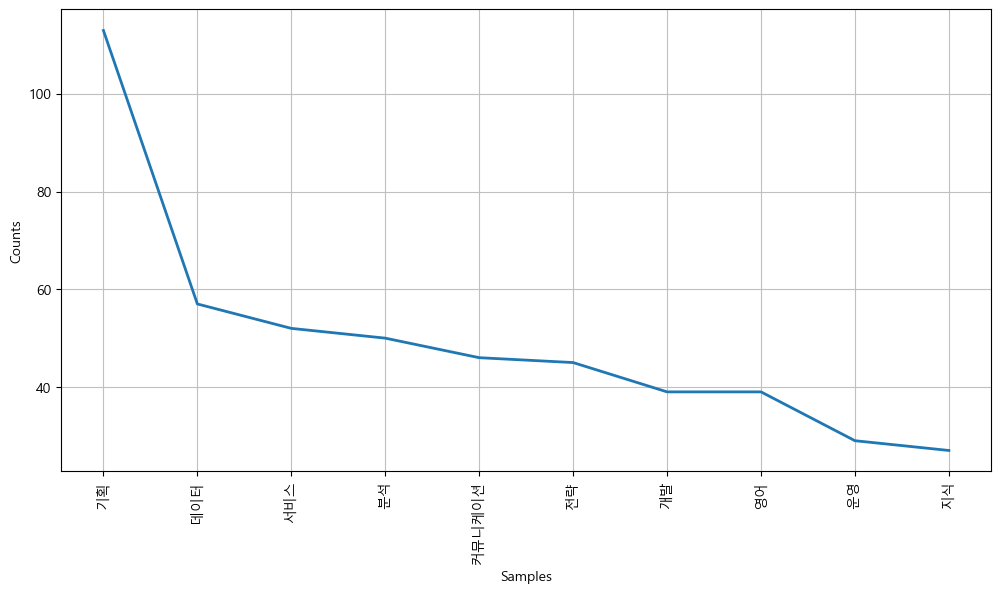

In [90]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

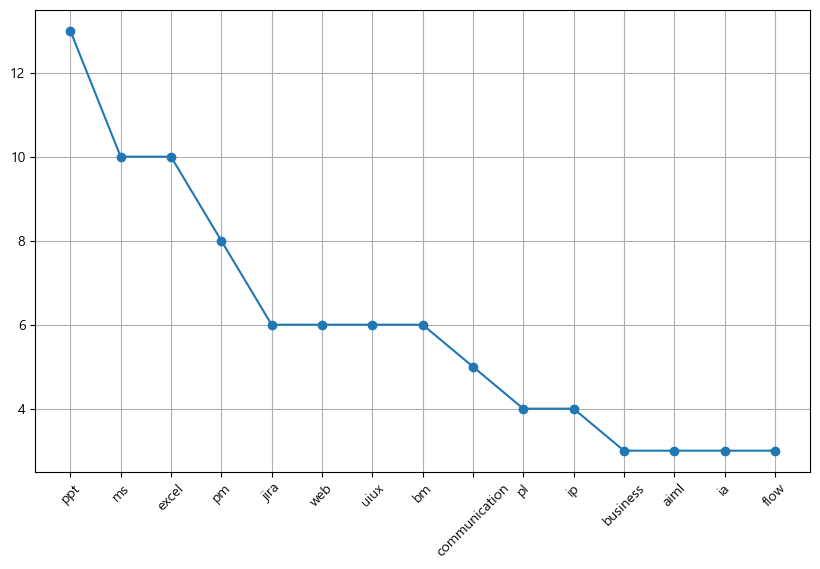

In [93]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)